In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import random
import statistics

#Define the parameters

se=0.25
sp=0.25
shear=-0.1

# Generate 1000 catalogues, each one of 10.000 intrinisic ellipticities and noise

eint=[np.random.normal(0,se,10000) for i in range(1000)]
noise=[np.random.normal(0,sp,10000) for i in range(1000)]

#Define the optimal estimator, its average and variance

def gamma(P,eint,noise):
    gamma=eint+shear-((P*se**2)/((P**2)*(se**2)+sp**2))*(P*eint+noise)
    return gamma
def average(P):
    average=statistics.mean([statistics.mean(gamma(P,eint[i],noise[i])) for i in range(1000)])
    return average
def error(P):
    error=statistics.mean([statistics.pvariance(gamma(P,eint[i],noise[i])) for i in range(1000)])
    return error

#Define the usual estimator, without polarization, its average and variance
usual=[np.random.normal(0,se,10000)+shear for i in range(1000)]
avg=[statistics.mean(usual[i]) for i in range(1000)]
sdg=[statistics.pvariance(usual[i]) for i in range(1000)]

#Pint the results and an example of setting P=0.5
print("average of usual= ",statistics.mean(avg))
print("variance of usual =' ",statistics.mean(sdg))
print("average of optimal= ",average(0.5))
print("variance of optimal = ",error(0.5))

average of usual=  -0.09992137502799407
variance of usual ='  0.06244590286115045
average of optimal=  -0.09994318074134693
variance of optimal =  0.049986420298684046


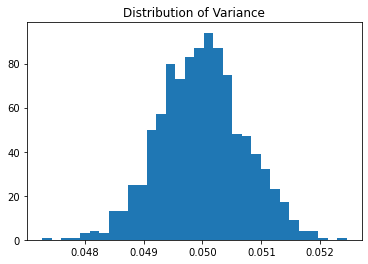

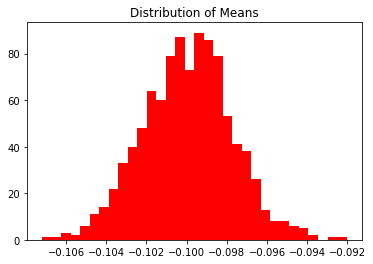

In [2]:
# Let us now make a histogram for a certain value of P (say P=0.5) for the average and the variance
y=[statistics.pvariance(gamma(0.5,eint[i],noise[i])) for i in range(1000)]
plt.hist(y,bins=32)
plt.title("Distribution of Variance")
plt.show()
z=[statistics.mean(gamma(0.5,eint[i],noise[i])) for i in range(1000)]
plt.hist(z,bins=32, color='red')
plt.title("Distribution of Means")
plt.show()

Text(0.5, 1.0, 'Dependence of Variance on P')

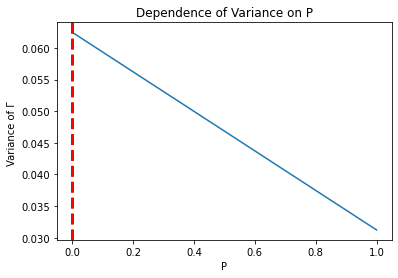

In [3]:
# The average of the optimal estimator is independent of P, since our estimator is unbiased.
# The variance though depends on P, and it gets smaller as P approaches unity. Let's see that by means of a plot:

x_plot = []
y_plot = []
for P in np.linspace(0.0,1.0,2):
    x_plot.append(P)
    y_plot.append(error(P))
    
plt.plot(x_plot,y_plot)
plt.xlabel("P")
plt.ylabel("Variance of Γ ")
plt.axvline(linewidth=3,linestyle="--",color='red')
plt.title("Dependence of Variance on P")